In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Epoch 1/5
25659/25659 [==============================] - 709s 28ms/step - loss: 1116917888.0000 - val_loss: 5322467840.0000
Epoch 2/5
25659/25659 [==============================] - 668s 26ms/step - loss: 1116920448.0000 - val_loss: 5322467840.0000
Epoch 3/5
25659/25659 [==============================] - 699s 27ms/step - loss: 1116918016.0000 - val_loss: 5322467840.0000
Epoch 4/5
25659/25659 [==============================] - 609s 24ms/step - loss: 1116920448.0000 - val_loss: 5322467840.0000
Epoch 5/5
292/292 [==============================] - 3s 11ms/step


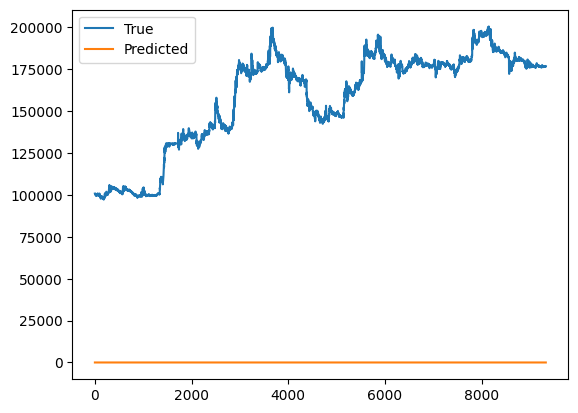

In [10]:
df = pd.read_csv('./lstm 학습 데이터.csv', encoding='euc-kr')
data = df.copy()
data = data[['시가','고가','저가','종가','거래량','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','NEWS','LABEL']]
dap = data['종가'].astype('int64')
# mms = MinMaxScaler()
# mms.fit(data)
# mmsResult = mms.transform(data)
# dataCh = pd.DataFrame(columns=data.columns, data=mmsResult)

X = np.array(data[['시가','고가','저가','거래량','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','NEWS','LABEL']])
y = np.array(dap)

# 데이터 분할 (학습 데이터와 테스트 데이터)
train_size = int(len(X) * 0.88)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(15, 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
modelpath="./lstm.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 학습
model.fit(X_train, y_train, validation_split=0.25, epochs=5, batch_size=2, callbacks=[early_stopping_callback, checkpointer])

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 시각화
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
    
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)

r2_y_pred = r2_score(y_test, y_pred)
print("r2 pred : ",r2_y_pred)

Mean Squared Error: 25727509630.192905
Mean Absolute Error: 157660.0975243811
Root Mean Square Error: 160397.97264988392
r2 pred :  -28.544571440621993


In [21]:
result = []
for i in range(len(y_pred)):
    result.append(round(y_pred[i][0]))
result_pred = np.array(result)

In [39]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [43]:
aa = y_pred[0][0]*(max(y_test)-min(y_test))+max(y_test)

In [44]:
aa

4.0

In [41]:
np.unique(y_pred)

array([1.], dtype=float32)

In [45]:
y_pred.min()

1.0

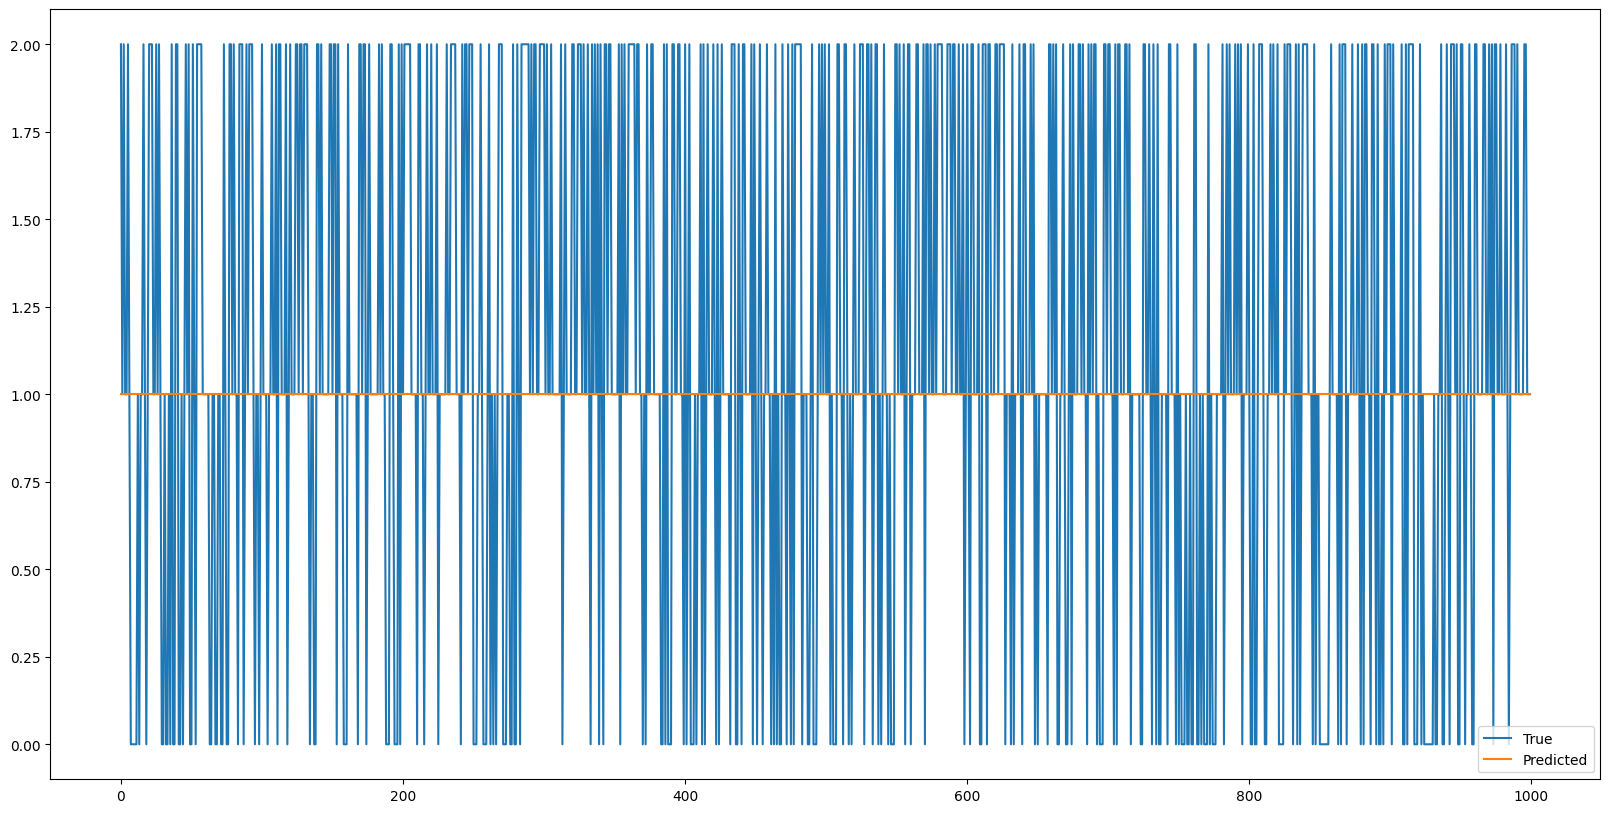

In [47]:
plt.figure(figsize=(20,10))
plt.plot(y_test[:1000], label='True')
plt.plot(y_pred[:1000], label='Predicted')
plt.legend()
plt.show()